In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from grb_afterglow_sim.spectrum import fireball_afterglow as grb

In [4]:
import grb_afterglow_sim.constants as cc

## GRB parameters for the fireball model

In [5]:
redshift = 5
n0 = 1
eps_b = 1e-4
eps_e = 0.1
E_iso = 1e53
eta=0.15
p=2.2  #>2
Y=0
ism_type=0

In [6]:
(5400)/912-1

4.921052631578948

## Compute SED at given times

In [7]:
#GFT:4000-17000 angstroms
#Eclair:
#MXT:
#Radio: 
wavelength=np.logspace(-7,12,1e4) #in angstroms
time = [30/86400,10/1440,1/24,1] # in days

frequencies = 3e8 / (wavelength*1e-10)

#Load object
afterglow=grb(n0=n0,eps_b=eps_b,eps_e=eps_e,E_iso=E_iso,eta=eta,p=p,Y=Y,z=redshift,ism_type=ism_type,disp=0)
#Compute light curve for each time
afterglow_lc=afterglow.light_curve(time,frequencies)


In [8]:
labels=['30s','10m','1h','1j']
colors=['blue','green','red','black']

<IPython.core.display.Javascript object>


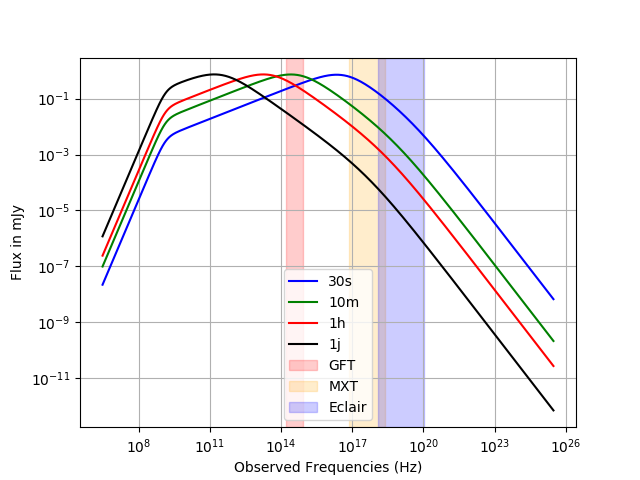

In [9]:
#Plot afterglow SED
plt.figure()
for i,t in enumerate(time):
    plt.plot(frequencies,afterglow_lc[i,:],label=labels[i],color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observed Frequencies (Hz)') 
plt.ylabel(r'Flux in mJy')
plt.grid(True)
plt.axvspan(cc.c_light_m_s*1e9/(350), cc.c_light_m_s*1e9/(1850),color='red', alpha=0.2,label="GFT")
plt.axvspan(0.3*1e3*cc.e_elec/(cc.H_planck), 10*1e3*cc.e_elec/(cc.H_planck), color='orange', alpha=0.2,label="MXT")
plt.axvspan(5e3*cc.e_elec/(cc.H_planck), 450e3*cc.e_elec/(cc.H_planck), color='blue', alpha=0.2,label="Eclair")

plt.legend(loc='best')


## Compute Light curve at given frequencies

In [11]:
#GFT:4000-17000 angstroms
#Eclair:
#MXT:
#Radio: 
wavelength=np.array([0.08,2.5,4500,16000]) #in angstroms
time = np.logspace(-5,7,1e4) # in days

g=4819
r=6201
i=7537
z=8658
J=12509
H=16345

wavelength=np.array([g,r,i,z,J,H]) #in angstroms
frequencies = 3e8 / (wavelength*1e-10)

#Load object
afterglow=grb(n0=n0,eps_b=eps_b,eps_e=eps_e,E_iso=E_iso,eta=eta,p=p,Y=Y,z=redshift,ism_type=ism_type,disp=0)
#Compute light curve for each time
afterglow_lc=afterglow.light_curve(time,frequencies)


In [12]:
#labels=['Eclair','MXT','g band','H band']
#colors=['blue','green','red','black']
labels=['g','r','i','z','J','H']
# Set color for plots
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(labels)+1)]

In [13]:
100*86400/1e6


8.64

<IPython.core.display.Javascript object>


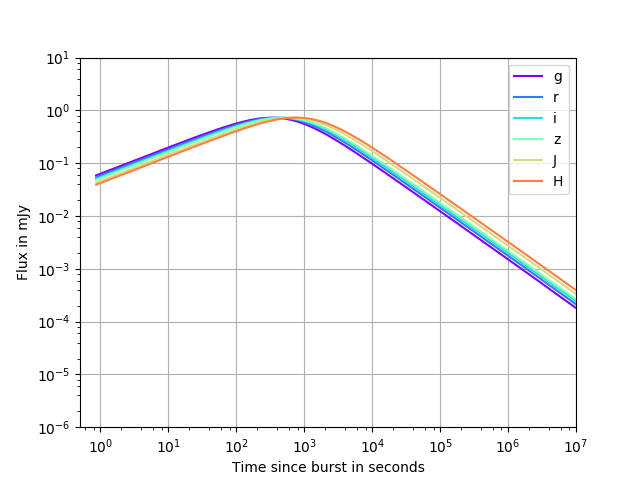

In [14]:
#Plot afterglow SED
plt.figure()
for i,wvl in enumerate(wavelength):
    plt.plot(time*86400,afterglow_lc[:,i],label=labels[i],color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6,10)
plt.xlim(5e-1,1e7)
plt.xlabel(r'Time since burst in seconds') 
plt.ylabel(r'Flux in mJy')
plt.grid(True)
plt.legend(loc='best')

# Adding IGM, dust and photoelectric absorption

In [18]:
from los_extinction.reddening import reddening
from los_extinction.igm import meiksin

In [19]:
#Compute dust extinction in Host galaxy and Milky Way
trans_dust_host=reddening(wavelength,redshift,Av=0.2).Pei92(law='smc',Xcut=True)[1]
trans_dust_mw=reddening(wavelength,0,Av=0.1).Pei92(law='mw',Xcut=True)[1]

In [20]:
#Compute gas extinction in Host galaxy and milky way
trans_photabs_host = reddening(wavelength,redshift,Av=0.2).gas_absorption(NHx=2)
trans_photabs_mw = reddening(wavelength,0,Av=0.2).gas_absorption()

In [21]:
#Compute IGM transmission
trans_IGM=meiksin(wavelength/10,redshift,Xcut=True)

In [22]:
trans_total=trans_dust_host*trans_dust_mw*trans_photabs_host*trans_photabs_mw*trans_IGM

<IPython.core.display.Javascript object>


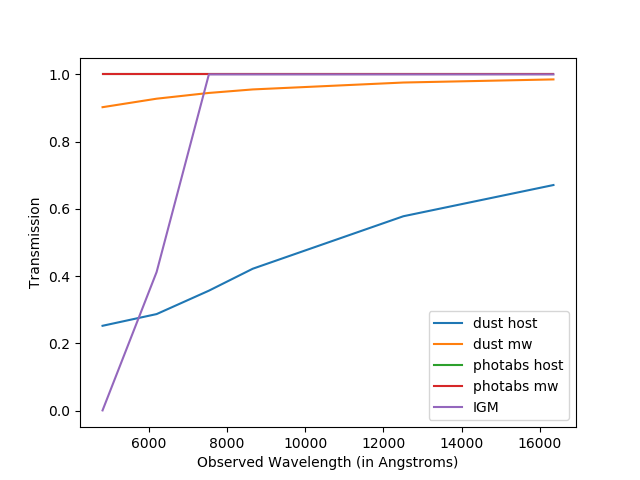

In [23]:
plt.figure()
plt.plot(wavelength,trans_dust_host,label='dust host')
plt.plot(wavelength,trans_dust_mw,label='dust mw')
plt.plot(wavelength,trans_photabs_host,label='photabs host')
plt.plot(wavelength,trans_photabs_mw,label='photabs mw')
plt.plot(wavelength,trans_IGM,label='IGM')
plt.ylabel('Transmission')
plt.xlabel('Observed Wavelength (in Angstroms)')
plt.legend(loc='lower right')
#plt.xscale('log')
#plt.xlim([5e0,5e5*(redshift+1)])

In [24]:
atm_g=0.776
atm_r=0.887
atm_i=0.928
atm_z=0.929
atm_J=0.932
atm_H=0.949
trans_atm=np.array([atm_g,atm_r,atm_i,atm_z,atm_J,atm_H])
tel_g=0.429
tel_r=0.424
tel_i=0.404
tel_z=0.318
tel_J=0.363
tel_H=0.369
trans_tel=np.array([tel_g,tel_r,tel_i,tel_z,tel_J,tel_H])

In [25]:
-

plt.savefig('grb7.png')

SyntaxError: invalid syntax (<ipython-input-25-e3d203a03ab4>, line 1)

In [26]:
1e6/86400

11.574074074074074

In [28]:
from astropy.io import fits
import matplotlib.patches as patches
#import pyregion
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm


<IPython.core.display.Javascript object>


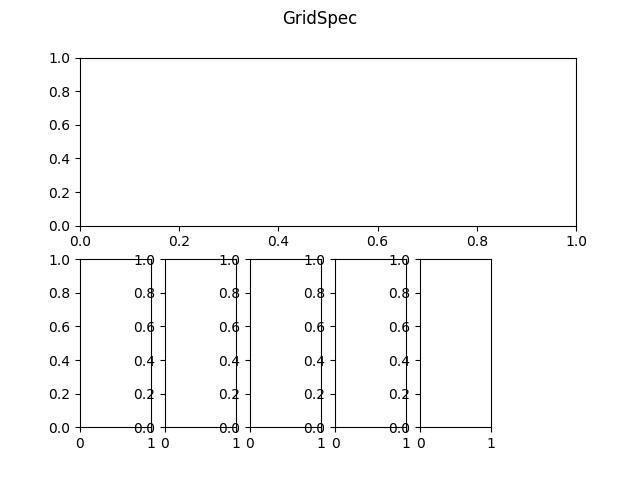

In [29]:
plt.figure()

gs = gridspec.GridSpec(2, 6)
ax1 = plt.subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=3))
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])
ax4 = plt.subplot(gs[1,2])
ax5 = plt.subplot(gs[1,3])
ax5 = plt.subplot(gs[1,4])

plt.suptitle("GridSpec")
#make_ticklabels_invisible(plt.gcf())



<IPython.core.display.Javascript object>


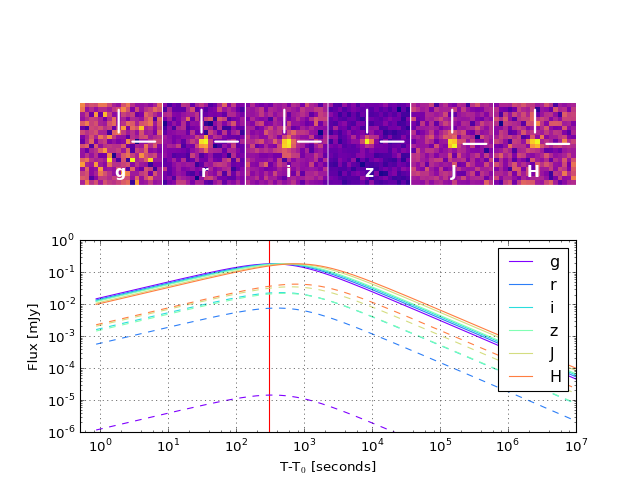

503 521 503 521


/home/dcorre/anaconda3/lib/python3.5/site-packages/pyregion/region_to_filter.py:109: UserWarning: 'as_region_filter' does not know how to convert line to a region filter.
  " to a region filter.".format(shape.name))


503 521 503 521
503 521 503 521
503 521 503 521
503 521 503 521
503 521 503 521


In [33]:
-

In [249]:
3631*10**(-0.4*19.79)

4.405814916038328e-05

In [58]:
-2.5*np.log10(2.0e-5/3631)

20.647490633122278